In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
from scipy.stats import norm
import scipy as sp
from scipy.integrate import simps
from numpy import trapz
from scipy.optimize import curve_fit
from scipy.special import gamma, factorial
import statistics
import math
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [3]:
wzp = -0.029 # Quasar Correction; defined in Bailor-Jones but computed in Lindegren et al. 2018

In [4]:
# Posterior PDF from Bailor-Jones et al.

def pOfR(r, px, dpx, Lsph):
    """
    This is Equation 2 in Bailer-Jones et al. 2018.
    Here, input r in pc's.
    """
    r = r/1000. #convert pc to kpc
    #px = px + 0.029 #Quasar correction already accounted for 
    exponent = -r/Lsph - (px-wzp-1/r)**2/(2*dpx**2)
    ans = r**2*np.exp(exponent)
    return ans

def gaussian(x, mu, sig):
    """
    a gaussian function
    """
    x = x/1000
    ans = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    return ans

In [5]:
def pOfR3(r, px, dpx, alpha, beta, L):
    """
    Bailer-Jones et al. 2020 geometric prior
    """
    #r = r/1000
    #distance prior
    exponent2= -(r/L)**alpha
    prior= (1/(gamma((beta+1)/alpha)))*(alpha/(L**(beta+1)))*((r/1000)**beta)*np.exp(exponent2)
    #likelihood (equation 2) 
    exponent = (-1/(2*(dpx**2)))*(px--.017-(1/(r/1000)))**2
    P = (1/(dpx*sqrt(2*pi)))*np.exp(exponent)
    ans=P*prior
    return ans

In [6]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)
plt.show()

# J1012 parallax measurements

In [7]:
# s/n of detection
1.7447569177332500/0.29057664


6.004463805945481

In [8]:
# parallax distance measurement from pulsar timing
pxPTA = 0.91650432571114162888
pxPTAerr =  0.20031527835021703532

In [9]:
# VLBI parallax measrument from Ding et al 2020
pxVLBI = 1.17 
pxVLBI_err= 0.02

In [10]:
# IPTA distance
dist_1012_ipta = norm(700, 200)

In [11]:
# Pb dot distance estimate
dist_px1012_pbdot = norm(1200, 200)

In [12]:
# IPTA distance measurement
ptaDist = 700 #pc
ptaDistErr = 200 #pc

In [13]:
pxmax = .3
pxmin = 4
gx = np.linspace(pxmax, pxmin, 1000)

In [14]:
pxmax=1
pxmin=20000
steps=10000
dx = np.linspace(pxmax,pxmin,steps)

In [15]:
valpbdot=[]
for zz in dx:
    valpbdot.append(sp.stats.norm.pdf(zz, 200, 200))

In [16]:
V1012=dx
dist_V1012 = norm(.83*1000, .04*1000)

In [17]:
px=np.linspace(0, 4, 1000)

In [18]:
VLBI = []
for rr in dx:
    VLBI.append(sp.stats.norm.pdf(rr, pxVLBI, pxVLBI_err ))

In [19]:
pxGEDR3 = 1.7447569177332500
pxGEDR3err = 0.29057664

In [20]:
pxGDR2=1.3259
pxGDR2err=0.4142

In [21]:
Gaia3_p=sp.stats.norm.pdf(px, pxGEDR3, pxGEDR3err)
Gaia2_p=sp.stats.norm.pdf(px, pxGDR2, pxGDR2err)
PTAp=sp.stats.norm.pdf(px, pxPTA, pxPTAerr)
VLBIp=sp.stats.norm.pdf(px, pxVLBI, pxVLBI_err)
combo3px=Gaia3_p*VLBIp*PTAp
combo2px=Gaia2_p*VLBIp*PTAp

In [22]:
Gaia3_px=Gaia3_p/simps(Gaia3_p, px)
Gaia2_px=Gaia2_p/simps(Gaia2_p, px)
PTApx=PTAp/simps(PTAp, px)
VLBIpx=VLBIp/simps(VLBIp, px)
c3px_norm=combo3px/simps(combo3px, px)
c2px_norm=combo2px/simps(combo2px, px)

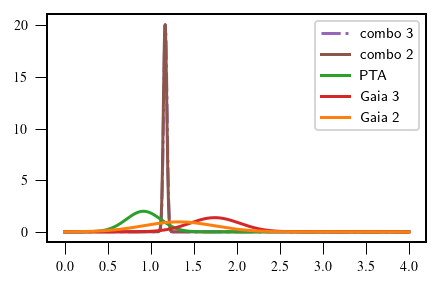

In [23]:
fig, ax1 = plt.subplots()
#dx, np.array(dist_px1024.pdf(px1024)
plt.plot(px, c3px_norm, label='combo 3', color = "C4", linestyle='-.')
plt.plot(px, c2px_norm, label='combo 2', color = "C5")#, linestyle='-.')
plt.plot(px, PTApx, label = 'PTA', color = "C2")#, linestyle='-.')
plt.plot(px, Gaia3_px, label='Gaia 3', color = "C3")
plt.plot(px, Gaia2_px, label='Gaia 2', color = "C1")
plt.legend()
#plt.plot(Gaia3_px)

In [24]:
for k in range(0, 10000):
    if k == 0:
        xx50 = px
        yy50 = c3px_norm
    else:
        xx50 = px[0:-k]
        yy50 =  c3px_norm[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50 = xx50[-1]
per_50


1.1691691691691692

In [25]:
for k in range(0, 10000):
    if k == 0:
        xx16 = px
        yy16 = c3px_norm
    else:
        xx16 = px[0:-k]
        yy16 =  c3px_norm[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16 = xx16[-1]
per_16

1.1491491491491492

In [26]:
c3px=per_50
c3pxerr=per_50-per_16

In [27]:
for k in range(0, 10000):
    if k == 0:
        xx50 = px
        yy50 = c2px_norm
    else:
        xx50 = px[0:-k]
        yy50 =  c2px_norm[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50 = xx50[-1]
per_50

1.165165165165165

In [28]:
for k in range(0, 10000):
    if k == 0:
        xx16 = px
        yy16 = c2px_norm
    else:
        xx16 = px[0:-k]
        yy16 =  c2px_norm[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16 = xx16[-1]
per_16

1.145145145145145

In [29]:
c2px=per_50
c2pxerr=per_50-per_16

In [30]:
# Bailer-Jones distance estimate
bj_1012 = []
Lsph=0.3575835102
for r in dx:
    bj_1012.append(pOfR(r,1.3259, 0.4142,0.3575835102))

In [31]:
pxGEDR3 = 1.7447569177332500
pxGEDR3err = 0.29057664
alpha=0.20484640174989
beta=6.0636550130832
L=2.76001118534369*(10**-5)
EDR3 = []
for r3 in dx:
    EDR3.append(pOfR3(r3, pxGEDR3, pxGEDR3err, alpha, beta, L))

In [32]:
valc3 =[]
for ww in dx:
    valc3.append(pOfR3(ww, c3px, c3pxerr, alpha, beta, L))

In [33]:
#valc3 =[]
valc2 =[]

#for ww in dx:
 #   valc3.append(pOfR3(ww, c3px, c3pxerr, alpha, beta, L))#alpha, beta, L))
                 
for ll in dx:
    valc2.append(pOfR(ll, c2px, c2pxerr, Lsph))

In [34]:
areaBJ = simps(bj_1012,dx) # simpsons rule to find the area under the curve, use to normalize
areaDR3 = simps(EDR3, dx)

(100.0, 1300.0)

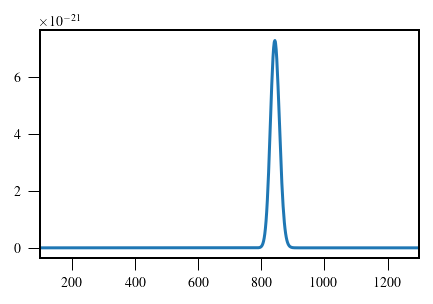

In [35]:
fig, ax1 = plt.subplots()
#plt.plot(dx, valc2)
plt.plot(dx, valc3)
plt.xlim(100, 1300)

In [36]:
valc3=np.array(valc3)*np.array(valpbdot)

In [37]:
valc2=np.array(valc2)*np.array(valpbdot)

In [38]:
#combo = dist_px1012_pbdot.pdf(dx)*np.array(EDR3)*dist_V1012.pdf(V1012)*dist_1012_ipta.pdf(dx)
#combo2= dist_px1012_pbdot.pdf(dx)*np.array(bj_1012)*dist_V1012.pdf(V1012)*dist_1012_ipta.pdf(dx)

In [39]:
areaCombo2 = simps(valc2, dx)
normCombo = simps(valc3, dx)
truecombo=valc3/normCombo
normCombo2=valc2/areaCombo2

In [40]:
# D_DM calculated with pygedm
# dispersion measure distance from NE 2001
d_DM_NE_1012 = 411.38864

# YMW 16 DM model
d_DM_YMW_1012 = 804.69373

In [41]:
#calculating percentiles

for k in range(0, 10000):
    if k == 0:
        xx95 = dx
        yy95 = truecombo
    else:
        xx95 = dx[0:-k]
        yy95 = truecombo[0:-k]
    v = np.trapz(yy95, xx95)
    if v <= 0.95:
        break
per_95 = xx95[-1]
int_95= yy95[-1]

for k in range(0, 10000):
    if k == 0:
        xx5 = dx
        yy5 = truecombo
    else:
        xx5 = dx[0:-k]
        yy5 = truecombo[0:-k]
    v = np.trapz(yy5, xx5)
    if v <= 0.05:
        break
per_5 = xx5[-1]
int_5= yy5[-1]

for k in range(0, 10000):
    if k == 0:
        xx16 = dx
        yy16 = truecombo
    else:
        xx16 = dx[0:-k]
        yy16 = truecombo[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16 = xx16[-1]
int_16= yy16[-1]

for k in range(0, 10000):
    if k == 0:
        xx84 = dx
        yy84 = truecombo
    else:
        xx84 = dx[0:-k]
        yy84 = truecombo[0:-k]
    v = np.trapz(yy84, xx84)
    if v <= 0.84:
        break
per_84 = xx84[-1]
int_84= yy84[-1]

for k in range(0, 10000):
    if k == 0:
        xx50 = dx
        yy50 = truecombo
    else:
        xx50 = dx[0:-k]
        yy50 = truecombo[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50 = xx50[-1]

print ("16/84:" + str(per_16) + " and "+ str(per_84))
per_50


16/84:825.0412041204121 and 853.0426042604261


839.0419041904191

In [42]:
print ("5/95:" + str(per_5) + " and "+ str(per_95))

5/95:817.0408040804081 and 863.0431043104311


In [43]:
837.2201318383978-per_95

-25.822972472033257

In [44]:
#finding peak
truecombo.max()
peak=np.where(truecombo==truecombo.max())
dx[peak]

array([839.04190419])

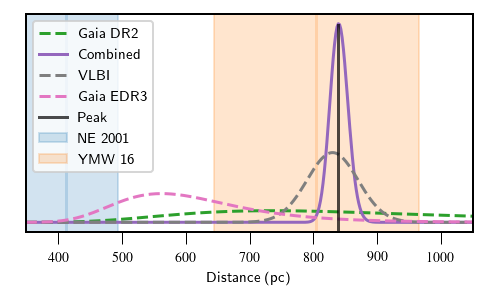

In [54]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1012*.8, d_DM_NE_1012*1.2, alpha=0.2, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1012, ymin=0, ymax=1, color = "C0", alpha = .2)


# DM YMW16 model
ax1.axvspan(d_DM_YMW_1012*.8, d_DM_YMW_1012*1.2, alpha=0.2, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1012, ymin=0, ymax=1, color = "C1", alpha=.2)

#Direct distance measurements
plt.plot(dx, np.array(bj_1012)/areaBJ, label = "Gaia DR2", color = "C2", linestyle='dashed')
#plt.plot(dx, dist_1012_ipta.pdf(dx), label = r"IPTA", color = "C3", linestyle='dashed')
#plt.plot(dx, dist_px1012_pbdot.pdf(dx), label = r"$D_K$", color = "C5", linestyle='-.')
plt.plot(dx, truecombo, label = "Combined", color = "C4", linestyle='solid')

plt.plot(dx, dist_V1012.pdf(V1012), label = "VLBI", color = "C7", linestyle='dashed')

plt.plot(dx, np.array(EDR3)/areaDR3, label = "Gaia EDR3", color = "C6", linestyle='dashed')

#percentiles
plt.axvline(dx[peak], ymin=0, ymax=.95, color = "k", label = "Peak", linestyle="-", alpha =.7)
#plt.axvline(per_5, ymin=0, ymax=int_5/.01, color = "b", label = "5, 95 \%", linestyle=":")
#plt.axvline(per_84, ymin=0, ymax=int_84/.013, color = "k", label= "84, 16 \%", linestyle=":")
#plt.axvline(per_16, ymin=0, ymax=int_16/.01, color = "k", linestyle=":")
#plt.axvline(per_95, ymin=0, ymax=int_95/.01, color = "b", linestyle=":")

plt.yticks([])
plt.xlim(350,1050)
plt.xlabel("Distance (pc)")
plt.tight_layout()
plt.legend(loc='upper left')
plt.savefig("combinedPDFs_1012wDM_WNG.pdf")

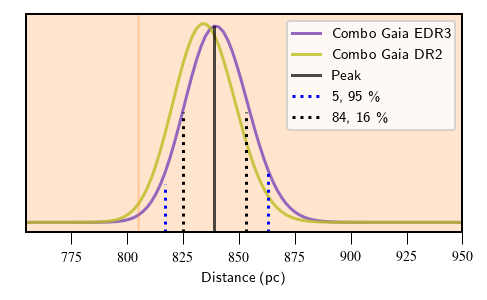

In [49]:
fig, ax1 = plt.subplots()

plt.plot(dx, truecombo, label = "Combo Gaia EDR3", color = "C4", linestyle='solid')
plt.plot(dx, normCombo2, label = "Combo Gaia DR2", color = "C8", linestyle='solid', alpha = .8)
#plt.plot(dx, dist_1012_ipta.pdf(dx), label = r"IPTA", color = "C3", linestyle='dashed')

#percentiles
plt.axvline(dx[peak], ymin=0, ymax=.94, color = "k", label = "Peak", linestyle="-", alpha =.7)
plt.axvline(per_5, ymin=0, ymax=.22, color = "b", label = "5, 95 \%", linestyle=":")
plt.axvline(per_84, ymin=0, ymax=.55, color = "k", label= "84, 16 \%", linestyle=":")
plt.axvline(per_16, ymin=0, ymax=.55, color = "k", linestyle=":")
plt.axvline(per_95, ymin=0, ymax=.28, color = "b", linestyle=":")

# DM NE 2001 model
#ax1.axvspan(d_DM_NE_1012*.8, d_DM_NE_1012*1.2, alpha=0.2, color = "C0", label = "NE 2001")
#plt.axvline(d_DM_NE_1012, ymin=0, ymax=1, color = "C0", alpha = .2)


# DM YMW16 model
ax1.axvspan(d_DM_YMW_1012*.8, d_DM_YMW_1012*1.2, alpha=0.2, color = "C1")#, label = "YMW 16")
plt.axvline(d_DM_YMW_1012, ymin=0, ymax=1, color = "C1", alpha=.2)


plt.yticks([])

plt.xlim(755,950)
plt.xlabel("Distance (pc)")
#plt.ylabel("Probability")
plt.tight_layout()
plt.legend()
plt.savefig("combo_comp_1012.pdf")

In [47]:
#newx = (1/gx)[50:400]
#newy = (combo/normCombo)[50:400]
newx = (dx/1000)
newy = ((combo)/normCombo)

NameError: name 'combo' is not defined

In [48]:
# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
    a, b, c, d = p
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d
    return y